In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) The need for Optimazation

In [32]:
def relu(input):
    return(max(0, input))

def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [33]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


In [34]:
input_data = [[0, 3], [1, 2], [-1, -2], [4, 0]]
input_data = np.array(input_data)
target_actuals = np.array([1, 3, 5, 7])

In [35]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 7.750000


## 2) Gradient Descent

In [36]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target=0

In [37]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

[14 28 42]
7
5.04


## 3) Creating a Keras Model

In [38]:
df = pd.read_csv('Datasets/hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [39]:
predictors = df.drop(['wage_per_hour'], axis=1).values
target = df.wage_per_hour.values

In [40]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

In [41]:
# Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [42]:
# Fit the model
model.fit(predictors, target)

17/17 [==============================] - 0s 1ms/step - loss: 67.1995


##  4) Classification model with Keras

In [43]:
df = pd.read_csv('Datasets/titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


In [45]:
df = df.astype('float64')

In [46]:
predictors = df.drop(['survived'], axis=1).values
predictors.shape

(891, 10)

In [47]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 1ms/step - loss: 1.9831 - accuracy: 0.5960


In [48]:
pred_data = np.genfromtxt('Datasets/pred_data_for_titanic.csv', delimiter=',')
pred_data.shape

(91, 10)

In [49]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.6761185  0.9639675  1.         0.685846   0.44528407 0.41928127
 0.09066958 0.64933443 0.5883945  0.9995084  0.520428   0.94990313
 0.51042664 0.9795759  0.44550985 0.1398676  0.56612605 0.99362093
 0.17037478 0.9709335  0.99999833 0.54928344 0.0963695  0.6965062
 0.9961604  0.31349963 0.9997342  0.9981748  0.35836396 0.99999046
 0.86840284 0.9244511  0.37809503 0.57461715 0.6879144  0.99999344
 0.6571285  0.44170794 0.99974686 0.9826948  0.6330357  0.7832826
 0.98655057 0.27458924 0.72233707 0.2263296  0.99986887 0.34404927
 0.9903211  0.999998   0.9732082  0.02497788 0.885966   0.9963851
 0.9576431  0.681268   1.         0.93692404 0.8825584  0.37809503
 0.667337   0.8115081  0.9377669  0.99987924 0.8134607  0.50639284
 0.8207591  0.9993073  0.53109086 0.7881008  0.52094054 0.9993037
 0.2358164  0.2228486  0.9566445  0.65895975 0.7346684  0.64894736
 0.43232152 0.9999926  0.9711112  0.38953018 0.7275037  0.6391864
 0.48757166 0.9407916  0.7761701  0.987543   0.9352409  0.9857653
 

In [50]:
predictions.shape

(91, 2)

## 5) Tune Parameters

### Changing optimization parameters

In [51]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [52]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 1ms/step - loss: 2.0986


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 1ms/step - loss: 1.3627


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 1ms/step - loss: 4173826816.0000


In [53]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 0s 9ms/step - loss: 1.1526 - accuracy: 0.6067 - val_loss: 0.5428 - val_accuracy: 0.7276


In [54]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = input_shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop optimization when the validation loss hasn't improved for 2 epochs 
#     by specifying the patience parameter of EarlyStopping() to be 2
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 10ms/step - loss: 4.2828 - accuracy: 0.3451 - val_loss: 3.4242 - val_accuracy: 0.3134
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 1.8294 - accuracy: 0.4141 - val_loss: 1.4573 - val_accuracy: 0.4888
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.9379 - accuracy: 0.6148 - val_loss: 0.9780 - val_accuracy: 0.6418
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.6517 - val_loss: 0.8970 - val_accuracy: 0.6493
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.8028 - accuracy: 0.6469 - val_loss: 0.8238 - val_accuracy: 0.6493
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7517 - accuracy: 0.6453 - val_loss: 0.7555 - val_accuracy: 0.6455
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7230 - accuracy: 0.6437 - val_loss: 0.7025 - val_accuracy: 0.6754
Epoch 8/30
20/20 [=

#### Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 6 epochs.

### Experimenting with wider networks
Model above is a relatively small network, with only 10 units in each hidden layer. 
We'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

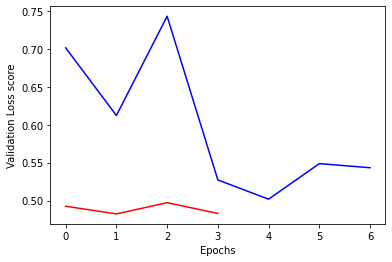

In [55]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss score')
plt.show()


#### The blue model (model_2 - wider network) is better than the red (model - small network). Blue model had a lower loss value.

### Adding layers to a network
Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

In [56]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_1 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu', input_shape=input_shape))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

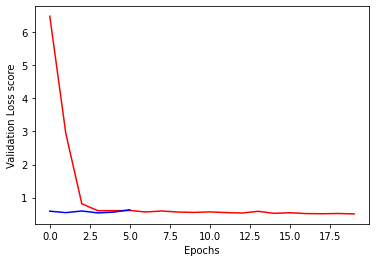

In [57]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss score')
plt.show()

#### The red model (model_1 - less hidden layer) is better than the blue (model_2 - more hidden layers). Red model had a lower loss value.

## 6) Building your own digit recognition model with Keras

In [58]:
from sklearn.datasets import load_digits
from keras.utils import to_categorical

digits = load_digits()
X = digits.data
print(X.shape)
# Convert the target to categorical: target
y = to_categorical(digits.target)
print(y.shape)

# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]

(1797, 64)
(1797, 10)


In [59]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)


40/40 [==============================] - 0s 6ms/step - loss: 2.2274 - accuracy: 0.4161 - val_loss: 1.1611 - val_accuracy: 0.6630
